In [4]:
    
    import jupyter, notebook, notebook as 📓, IPython, pidgy, pidgy as 🐦, mistune as markdown, mistune as M⬇️, IPython as python, ast, jinja2 as template, importnb as _import_, doctest, pathlib, graphviz    
    from pidgy.tests import interactive as testing
    shell = IPython.get_ipython()
    import pandas as 🐼
    Ø = __name__ == '__main__'

    import pidgy.reuse, pidgy.conversion, pidgy.cli, pidgy.tests.readme, appendix, intro, test_pidgin_syntax
    input_formats = !pandoc --list-input-formats
    input_formats = {x.split('_')[0] for x in input_formats}
    kernels = 🐼.read_html(appendix.get('https://github.com/jupyter/jupyter/wiki/Jupyter-kernels'))[0]
    display(🐦.__style__)

    🐦.__style__

In [5]:
{{appendix.exports(intro)}}

# `"pidgin"` programming



`"pidgin"` literate programming is an approach to writing 
computational literature where `"code"` is included to supplement
and support the meaning of the narrative.
The outcome of `"pidgin"` programs are `"pidgin"` documents
written in fluid combinations of natural and programming languages.
Ultimately, `"pidgin"` authors and programmers will find themselves
writing literature with sprinkles of code or
code supplemented by literature, 
and in either application the documents will have varying qualities 
of readability and reproducible, or literacy or computability.

`pidgy` is an implementation of `"pidgin"` programming developed 
throughout this document to demonstrate specific concepts.
`pidgy` is designed for authoring `"pidgin"` documents 
using the `jupyter` `notebook` and `jupyterlab` as a word processing
tool back by an iterative, literate computing environment.
`notebook`s are a natural substrate for reproducible, literate programs
because their schema refers explicitly to 
two primary cell types: `markdown and "code"`.
It follows that `🐦 `'s document language is `markdown`
with `IPython, python` as the glue programming language.

In `🐦, pidgy and "pidgin"` programming, units (ie. cells)
in a `notebook` are written in `markdown` with the 
shared intent of designing readable outputs
and source that `python` can `compile`.
`pidgy` demonstrates this behavior with
extensions for the `IPython.InteractiveShell` and `ipykernel`
that augments the interactive REPL experience to be 
suitable for an implicit literate programming experience.
Authors interactively read, write, and revise their 
input as units readable output units,
as working code units,
and formal test objects.

`"pidgin"` documents are flexible formats that can 
be transformed in varities of literature, source code, and formal tests.
`pidgy` relies on open source infrastructure to 
provide multiple reusable states of `pidgy` documents. 
`pidgy` documents abide an `nbformat` version which 
identifies a `jsonschema` that validates the shape of the document.
From the `nbformat`, 
`nbconvert` transforms `notebook`s to other file formats (eg. `markdown and python`),
`importnb` allows `pidgy` documents to be import like any python module, 
`doctest` to provide interactive documentation testing,
and `pytest` to establish formal testing procedures for `pidgy` documents.

Open source communities have worked together to 
improve access scientific computing technologies.
Increased access to scientific computing technologies
has reduced the demand for verbose code bases
and may be acheived by a simple api.
As such, non programmers can begin to participate in
interactive computing through their abilities to tell stories.

`pidgy` is hella fun to write in.



In [9]:
{{appendix.exports(pidgy.reuse)}}

# Reusable computable literature



    def load_ipython_extension(shell):
        """
A primary requirement is that `pidgy` documents can be included
in other `pidgy` documents, and, consequently, other `python` tools.
To acheive this, `pidgy` modifies
how `python` finds `__import__`s, this is acheived with an
existing tool called `importnb` that includes
`notebook` documents in `sys.path_hooks` used to discover modules.      
        
        """; pidgy.pidgyLoader(position=-1).__enter__()



    class pidgyLoader(importnb.Notebook): 
        """
To identify `pidgy` `notebook`s against other notebooks we 
introduce the hybrid extension `".md.ipynb"`.

        """
        extensions = ".md.ipynb".split()
        
        def code(self, str): 
            """
The `"code"` method of the `__import__` loader
performs string transforms to code cells.
`pidgy` uses the same method 
that the `shell.input_transformer_manager`.


            """
            with importnb.Notebook():
                try: from . import translate
                except: import translate
            return ''.join(translate.pidgy.transform_cell(str))
        
        def visit(self, node):
            """
The `"visit"` method provides modifications to the
abstract syntax tree.
            
            """
            with importnb.Notebook():
                try: from . import translate
                except: import translate
            return translate.ReturnYield().visit(node)



In [7]:
{{appendix.exports(pidgy.conversion)}}

# Deriving files from `pidgy` documents.



There are numerous tools that use the `notebook` format as an intermediate formats
for different documents.

The original literate programming used latex as the sole export format
where as the notebook recognizes quite a few formats:
    
<details><summary><code>nbconvert</code> can generate <b>12</b> different formats from the files that abide the <code>nbformat</code>
schema.</summary>
<ul><li>html</li>
<li>python</li>
<li>asciidoc</li>
<li>notebook</li>
<li>slides</li>
<li>pdf</li>
<li>latex</li>
<li>selectLanguage</li>
<li>custom</li>
<li>script</li>
<li>markdown</li>
<li>rst</li>
</ul>
</details>




    class pidgyTranslate(nbconvert.preprocessors.Preprocessor):
        def preprocess_cell(self, cell, resources, index, ):
            import pidgy
            if cell['cell_type'] == 'code':
                cell['source'] = pidgy.imports.pidgy.transform_cell(''.join(cell['source']))
            return cell, resources



    class pidgyNormalize(nbconvert.preprocessors.Preprocessor):
Untangle a pidgy notebook into a normalized notebook that explicitly sepearting code and markdown cells.
A normalized notebook can be imported by importnb.
        
        def preprocess(self, nb, resources):
            new, tokens = nbformat.v4.new_notebook(), []
            for cell in nb.cells:
                for token in tokenizer.parse(''.join(cell.source)) if cell.cell_type == 'code' else [{'type': 'paragraph', 'text': ''.join(cell.source)}]:
                    new.cells.append((
                        nbformat.v4.new_code_cell if token['type'] == 'code' else nbformat.v4.new_markdown_cell
                    )(token['text'].splitlines(True)))
            return nb, resources



In [5]:
{{appendix.exports(pidgy.tests.readme)}}

## Literature as the test

A strong intertextuallity may emerge when 
the primary target of a document is literature.
Some of the literary content may include `"code"` `object`s
that can be tested to qualify the veracity of these
dual signifiers.

`pidgy` documents are designed to be tested under
multiple formal testing conditions.
This is motivated by the `python`ic concept of documentation testing,
or `doctest`ing, which in itself is a literate programming style.
A `pidgy` document includes `doctest`, it verifies `notebook` `input`/`"output"`,
and any formally defined tests are collected.



`pidgy` provides a `pytest` plugin that works only on `".md.ipynb"` files.
The `pidgy.kernel` works directly with `nbval`, install the python packkage and use the --nbval flag.
`pidgy` uses features from `importnb` to support standard tests discovery, 
and `doctest` discovery across all strings.

Still working on coverage.



    class pidgyModule(importnb.utils.pytest_importnb.NotebookModule):
The `pidgyModule` permits standard test discovery in notebooks.
Functions beginning with `"test_"` indicate test functions.

        loader = pidgy.imports.pidgyLoader



    class pidgyTests(importnb.utils.pytest_importnb.NotebookTests):
        modules = pidgyModule,

    pytest_collect_file = pidgyTests.__call__



In [6]:
{{appendix.exports(pidgy.cli)}}

![svg](output_1_0.svg)




# `pidgy` co-developments

`pidgy` documents are written in `markdown`,
and `"code"` is an intertextual feature of the narrative.
We'll find that `pidgy` documents can serve many purposes like:
* being a piece of literature.
* being a piece of documentation.
* being a testing unit.
* being a `python` module.
* being a command line application.
* being a web service.

`markdown`as a programming language can encapsulate
any formal programming languages as
either block or fenced objects.
They are literate programs that combine human & machine logic 
to provide enriched meaning to the document.



`pidgy`'s literate programs are designed to be reused in multiple contexts.



    @click.group()
    def app(): 
The `pidgy` command line application operates on passive notebooks
documents.



    @app.group()
    def kernel():
Serve notebook modules from fastapi creating an openapi schema for each 
literate document.

    @kernel.command()
    def install(user=False, replace=None, prefix=None):
        with pidgy.translate.pidgyLoader():
            from .kernel import shell
        dest =shell.install(user=user, replace=replace, prefix=prefix)
        click.echo(F"The pidgy kernel was install in {dest}")
        
    @kernel.command()
    def uninstall(user=True, replace=None, prefix=None):
        with pidgy.translate.pidgyLoader():
            from .kernel import shell
        shell.uninstall()
        click.echo(F"The pidgy kernel was removed.")
        



    @app.command()
    def serve(modules):
Serve notebook modules from fastapi creating an openapi schema for each 
literate document.



    @app.command()
    def run(modules, parallel=True):
Run a collection of notebook modules.



    @app.command()
    def convert(modules):
Convert notebook written in pidgy to difference formats.



In [7]:
{{appendix.exports(pidgy.kernel.shell)}}

# The `pidgy` shell-kernel model


The shell is the application either jupyterlab or jupyter notebook, the kernel determines the programming language.  Below we design a just jupyter kernel that can be installed using 

    !pidgy kernel install


    def install(kernel_name='pidgy',
        user=True,
        replace=None,
        prefix=None
    ):
        return ipykernel.kernelspec.KernelSpecManager().install_kernel_spec(
            str(pathlib.Path(globals().get('__file__', pathlib.Path('spec'))).parent/'spec'), kernel_name=kernel_name,
            user=user, replace=replace, prefix=prefix)



    def uninstall(kernel_name='pidgy',):
        ipykernel.kernelspec.KernelSpecManager().remove_kernel_spec(kernel_name)



In [8]:
{{appendix.exports(pidgy.extension)}}

# Building the `pidgy` extension


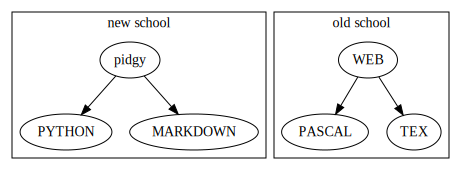

UndefinedError: 'translate' is undefined

## programming in `markdown and python` 
[📓]({{pathlib.Path(translate.__file__).name}})


{{appendix.exports(pidgy.translate)}}

    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgy {label="new school" pidgy->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [9]:
## programming in `markdown and python` 
[📓]({{pathlib.Path(translate.__file__).name}})


{{appendix.exports(pidgy.translate)}}

    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgy {label="new school" pidgy->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [10]:
## testing `"code"` in the `markdown` narrative.
[📔]({{pathlib.Path(testing.__file__).name}})

{{appendix.exports(pidgy.tests.interactive)}}

## testing `"code"` in the `markdown` narrative.
[📔](interactive.md.ipynb)

    import IPython as python, doctest, textwrap
    pidgy= None



In literate programs, `"code"` is deeply entangled with the narrative.
`"code"` object can signify meaning and can be validated through testing.
`python` introduced the `doctest` literate programming convention that indicates some text in a narrative can be tested.
`pidgy` extends the `doctest` opinion to the inline markdown code.
Each time a `pidgy` cell is executed, the `doctest`s and inline code are executed ensuring that
any code in a `pidgy` program is valid.



    def post_run_cell(result):
        result.runner = test_markdown_string(result.info.raw_cell, IPython.get_ipython(), False, doctest.ELLIPSIS)

    def load_ipython_extension(shell): 
        unload_ipython_extension(shell)
        shell.events.register('post_run_cell', post_run_cell)



    import doctest, contextlib, mistune as markdown, re, ast, __main__, IPython, operator
    shell = IPython.get_ipython()


`test_markdown_string` extends the standard python `doctest` tools 
to inline code objects written in markdown.  
This approach compliments are markdown forward programming language to test
intertextual references between code and narrative.


    INLINE = re.compile(
        markdown.InlineGrammar.code
        .pattern[1:]
        .replace('[\s\S]*', '?P<source>[\s\S]+')
        .replace('+)\s*', '{1,2})(?P<indent>\s{0})'), 
    )


    (TICK,), SPACE = '`'.split(), ' '



    import doctest



    def test_markdown_string(str, shell=shell, verbose=False, compileflags=None):
        globs, filename = shell.user_ns, F"In[{shell.last_execution_result.execution_count}]"
        runner = doctest.DocTestRunner(verbose=verbose, optionflags=compileflags)  
        parsers = DocTestParser(runner), InlineDoctestParser(runner)
        parsers = {
            parser: doctest.DocTestFinder(verbose, parser).find(str, filename) for parser in parsers
        }
        examples = sum([test.examples for x in parsers.values() for test in x], [])
        examples.sort(key=operator.attrgetter('lineno'))
        with ipython_compiler(shell):
            for example in examples:
                for parser, value in parsers.items():
                    for value in value:
                        if example in value.examples:
                            with parser:
                                runner.run(doctest.DocTest(
                                    [example], globs, value.name, filename, example.lineno, value.docstring
                                ), compileflags=compileflags, clear_globs=False)
        shell.log.info(F"In[{shell.last_execution_result.execution_count}]: {runner.summarize()}")
        return runner



    @contextlib.contextmanager
    def ipython_compiler(shell):
        def compiler(input, filename, symbol, *args, **kwargs):
            nonlocal shell
            return shell.compile(
                ast.Interactive(
                    body=shell.transform_ast(
                        shell.compile.ast_parse(shell.transform_cell(textwrap.indent(input, ' '*4)))
                    ).body
                ),
                F"In[{shell.last_execution_result.execution_count}]",
                "single",
            )

        yield setattr(doctest, "compile", compiler)
        doctest.compile = compile



In [11]:
## Weaving the `markdown` to a rich display.
[📗]({{pathlib.Path(pidgy.outputs.__file__).name}})

{{appendix.exports(pidgy.outputs)}}

## Weaving the `markdown` to a rich display.
[📗](outputs.md.ipynb)



In [12]:
## `pidgy` metasyntax at language interfaces.
[📗]({{pathlib.Path(test_pidgin_syntax.__file__).name}})

The combinations of document, programming, and templating languages
provides unique syntaxes as the interfaces.

{{appendix.exports(test_pidgin_syntax)}}

## `pidgy` metasyntax at language interfaces.
[📗](test_pidgin_syntax.md.ipynb)

The combinations of document, programming, and templating languages
provides unique syntaxes as the interfaces.

This is a code string




`pidgy` programming is a `markdown`-forward approach to programming,
it extends computational to interactive literate programming environment.
One feature `markdown` uses to identify `markdown.BlockGrammar.block_code`
is indented code.
`pidgy` starts here, all cells are `markdown` forward, and code is identified as indented code.

            "This is a code string"
    



### Code fences

Some folks may prefer code fences and they may be used without a language specified.


```
"This is code"
```

```python
"This is not code."
```



    class DocStrings:
### Docstrings


    >>> assert DocStrings.__doc__.startswith('### Docstrings')
    >>> DocStrings.function_docstring.__doc__
    '`DocStrings.function_docstring`s appear as native docstrings, ...'


        def function_docstring():
`DocStrings.function_docstring`s appear as native docstrings, but render as `markdown`.
            
            ...

    





    import doctest
### `doctest`

    >>> assert True
    >>> print
    <built-in function print>
    >>> pidgy
    <module...__init__.py'>



### templating

filters
jinja docs



In [13]:
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown --TemplateExporter.exclude_input=True --stdout paper.md.ipynb > readme.md
    ...;

[NbConvertApp] Converting notebook paper.md.ipynb to markdown
